KNN : K-Nearest Nighber

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


describe

In [6]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


missing data

In [8]:
na_features = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in na_features:
    print(feature,'\t\t', np.round(df[feature].isnull().mean(),3), '%')

visualize

In [9]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

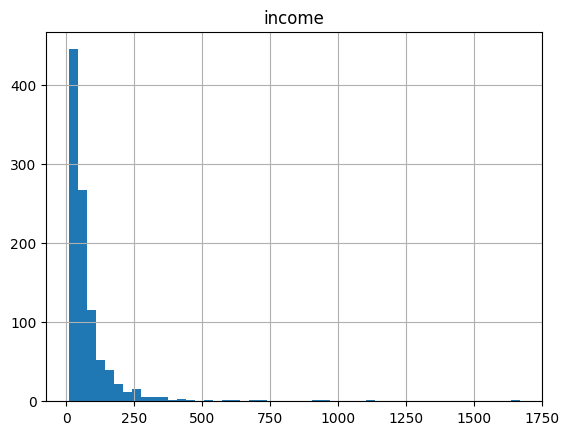

In [13]:
df.hist(column= 'income', bins=50)

In [32]:
temp = list(df.columns)
column_names = temp[:len(temp)-1]
print(column_names)


['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']


feature(X) and label(Y)

In [39]:
X = df[column_names].values
X[:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [40]:
Y = df['custcat'].values
Y[:5]

array([1, 4, 3, 1, 3], dtype=int64)

Normalized

In [50]:
print(X[:5])

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))

print(X[:5])

[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]
[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1

Train and Test Split

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

print(f'Train :\n{x_train.shape}\t{y_train.shape}')
print(f'test :\n{x_test.shape}\t{y_test.shape}')

Train :
(800, 11)	(800,)
test :
(200, 11)	(200,)


KNN Classification

In [62]:
from sklearn.neighbors import KNeighborsClassifier


Train

In [63]:

k=4
neigh = KNeighborsClassifier(n_neighbors= k).fit(x_train,y_train)    

predict

In [64]:
y_hat = neigh.predict(x_test)
y_hat[:5]

array([1, 1, 3, 2, 4], dtype=int64)

Accuracy Evaluation

In [65]:
from sklearn import metrics

print(f'Train set Accuracy : {metrics.accuracy_score(y_train, neigh.predict(x_train))}')
print(f'Test set Accuracy : {metrics.accuracy_score(y_test, y_hat)}')

Train set Accuracy : 0.5475
Test set Accuracy : 0.32


train and test accuracy for k = 2,3,4,5

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

accuracies = []

for k in range(1,10):
    print(f'K = {k}')
    neigh = KNeighborsClassifier(n_neighbors= k).fit(x_train,y_train)

    y_hat = neigh.predict(x_test)
    print(f'y_hat for k = {k} :\n{y_hat[:5]}')
    print(f'real y :\n{y_test[:5]}')

    print(f'Train set Accuracy for k = {k} : {metrics.accuracy_score(y_train, neigh.predict(x_train))}')
    print(f'Test set Accuracy k = {k} : {metrics.accuracy_score(y_test, y_hat)}')
    accuracies.append(metrics.accuracy_score(y_test, y_hat))
    print('-' * 40)


    

K = 1
y_hat for k = 1 :
[3 3 3 4 4]
real y :
[4 1 1 2 4]
Train set Accuracy for k = 1 : 1.0
Test set Accuracy k = 1 : 0.3
----------------------------------------
K = 2
y_hat for k = 2 :
[3 1 1 2 2]
real y :
[4 1 1 2 4]
Train set Accuracy for k = 2 : 0.6175
Test set Accuracy k = 2 : 0.29
----------------------------------------
K = 3
y_hat for k = 3 :
[1 3 1 4 4]
real y :
[4 1 1 2 4]
Train set Accuracy for k = 3 : 0.56875
Test set Accuracy k = 3 : 0.315
----------------------------------------
K = 4
y_hat for k = 4 :
[1 1 3 2 4]
real y :
[4 1 1 2 4]
Train set Accuracy for k = 4 : 0.5475
Test set Accuracy k = 4 : 0.32
----------------------------------------
K = 5
y_hat for k = 5 :
[1 3 3 4 4]
real y :
[4 1 1 2 4]
Train set Accuracy for k = 5 : 0.5375
Test set Accuracy k = 5 : 0.315
----------------------------------------
K = 6
y_hat for k = 6 :
[3 3 3 4 4]
real y :
[4 1 1 2 4]
Train set Accuracy for k = 6 : 0.51625
Test set Accuracy k = 6 : 0.31
---------------------------------------

Text(0, 0.5, 'Accuracy of Test')

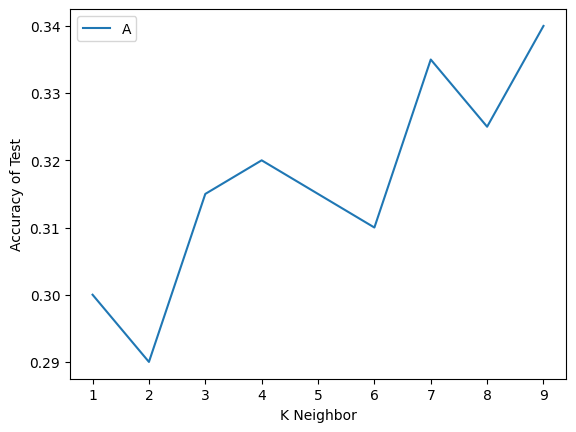

In [75]:
plt.plot(range(1, 10), accuracies)
plt.legend('Accuracy')
plt.xlabel('K Neighbor')
plt.ylabel('Accuracy of Test')

the best conditions :

In [77]:
print(f'The best accuracy is {max(accuracies)} with k = {accuracies.index(max(accuracies)) +1 }')

The best accuracy is 0.34 with k = 9
